# Advertisement project

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [13]:
df=pd.read_csv("C:/Users/Lenovo/Desktop/dataset/project datatrained/advertisement.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


checking dimension and information about the dataset

In [14]:
df.shape

(200, 5)

More about the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

# Checking Null values

In [17]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

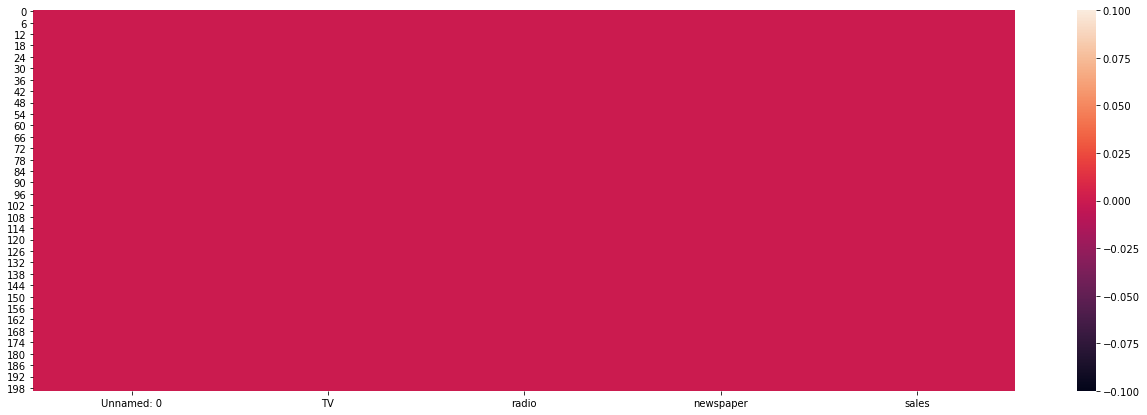

In [18]:
plt.figure(figsize=(22,7))
sns.heatmap(df.isnull())
plt.show()

There is no null values present in the dataset

In [19]:
df.describe()#statistical analysis

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

we donot need Unnamed:0 because its showing the index representation .so we remove it

In [21]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


divide independent and dependent variable as x,y respectively

In [22]:
x=df.drop('sales',axis=1)
y=df['sales']

Though all values of columns are continious we use scatterplot,boxplot for visualization to check if outlier present in the dataset or not.

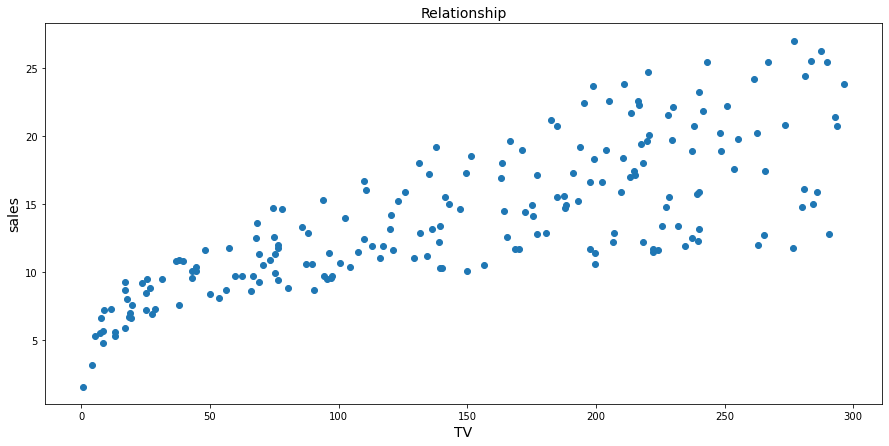

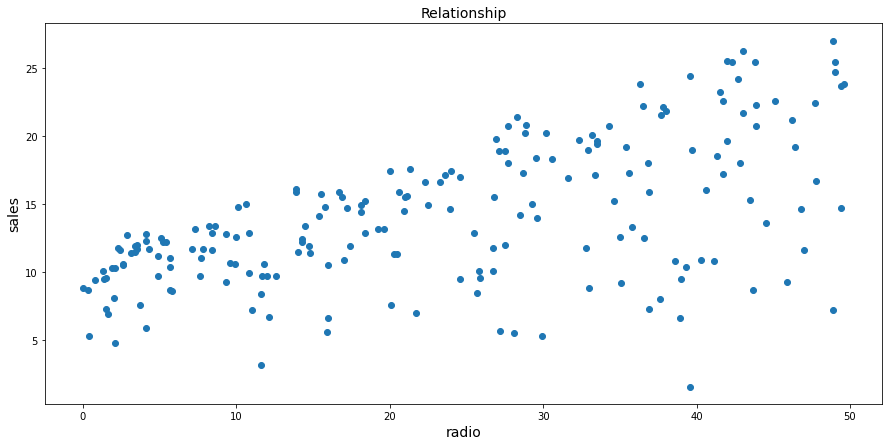

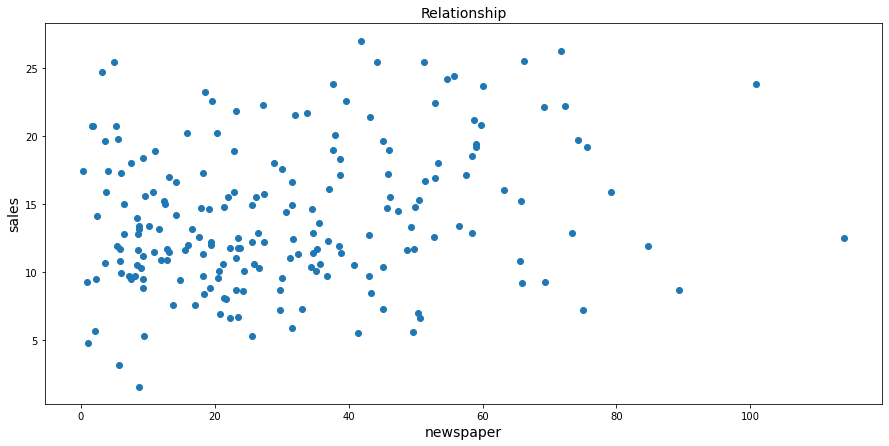

In [23]:
for i in x.columns:
    plt.figure(figsize=(15,7))
    plt.scatter(x=x[i],y=df['sales'])
    plt.xlabel(i,fontsize=14)
    plt.ylabel('sales',fontsize=14)
    plt.title('Relationship',fontsize=14)
    plt.show()

both for Tv and radio,our output variable sales is +ve relationship

# checking outlier

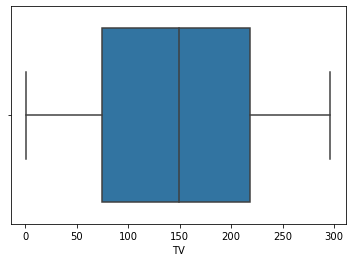

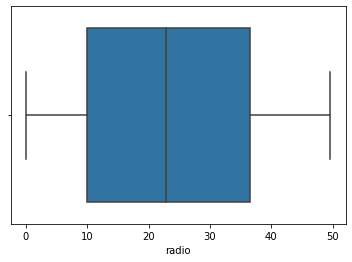

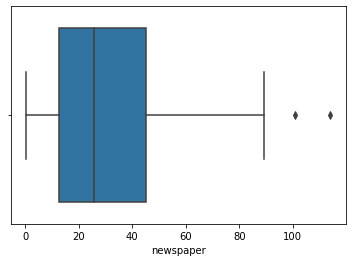

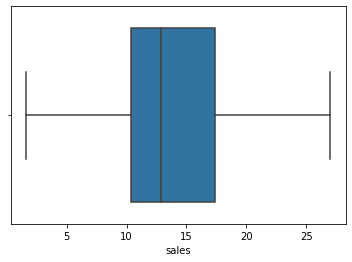

In [28]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

from using above boxplot,we see that there are two outlier in newspaper column

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


finding 16 and 101 rows in the dataset

In [30]:
df.iloc[[16,101],:]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [31]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

both are outlier because std is more .so we remove it 

In [32]:
df=df[(z<3).all(axis=1)]

In [33]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


now our dataset has 198 rows and 4 columns

# Checking Corelation

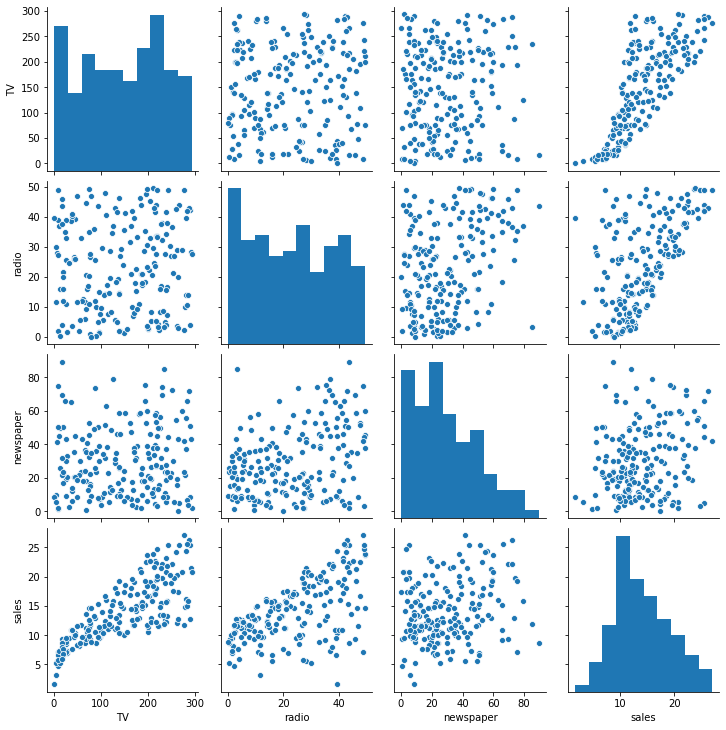

In [34]:
sns.pairplot(df)

In [36]:
df.corr()['sales']

TV           0.779121
radio        0.576748
newspaper    0.219555
sales        1.000000
Name: sales, dtype: float64

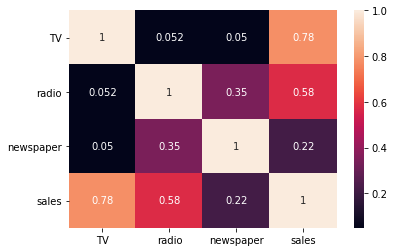

In [37]:
sns.heatmap(df.corr(),annot=True)

Tv is highly corelated to sales followed by radio and newspaper.

# checking skewness

In [38]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

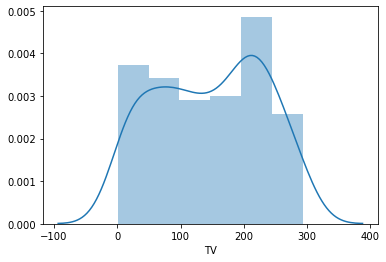

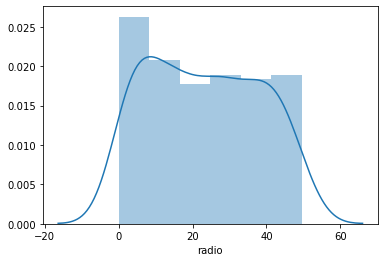

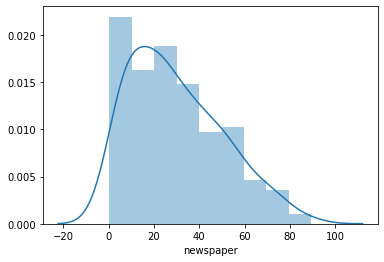

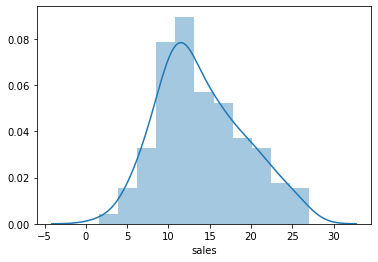

In [39]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

newspaper column has some skewness present.we remove it by using powertranfromation

In [40]:
from sklearn.preprocessing import power_transform
df['newspaper']=power_transform(df[['newspaper']])

In [41]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

skewness is removed from the dataset

divide x and y again as we remove its 2 rows

In [42]:
x=df.drop('sales',axis=1)
y=df['sales']

standardization of x

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

finding random_state

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [45]:
maxacc=0
maxrs=0
lr=LinearRegression()
for i  in range(1,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy score is',maxacc,'on random_state',maxrs)

best accuracy score is 0.9260692374470677 on random_state 11


so our random_state is 11

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [47]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9260692374470677

In [49]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

In [51]:
ls=Lasso()
svr=SVR()
rd=Ridge()
els=ElasticNet()
ex=XGBRegressor()

In [52]:
model=[lr,ls,svr,rd,els,ex]

In [53]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(r2_score(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))

LinearRegression()
0.9260692374470677
2.049824653502303
Lasso()
0.8177660872513255
5.052667579195756
SVR()
0.9308907880553932
1.9161410154094525
Ridge()
0.9255346390780027
2.064647074897551
ElasticNet()
0.7184901317369806
7.805220022674247
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9771563649023569
0.6333689087169025


# Using ensemble algorithm 

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_Pred=rf.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9771563649023569

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_Pred=gb.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9771563649023569

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_Pred=ext.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9771563649023569

In [57]:
import warnings
warnings.filterwarnings('ignore')

find  cv

In [58]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv=cross_val_score(lr,x_train,y_train,cv=j)
    print('accuracy',cv.mean(),'for cv=',j )

accuracy 0.8575047937536269 for cv= 2
accuracy 0.8724805920418562 for cv= 3
accuracy 0.8563974343372038 for cv= 4
accuracy 0.8627327105134736 for cv= 5
accuracy 0.843579519021065 for cv= 6
accuracy 0.8663332020719905 for cv= 7
accuracy 0.8576929625392398 for cv= 8
accuracy 0.8593794600128672 for cv= 9


cv=3

In [61]:
model=[lr,ls,rf,svr,rd,els,ex,ext,gb]

In [62]:
for i in model:
    acc=cross_val_score(i,x,y,cv=3)
    print('accuracy is',acc.mean(),'for',i)

accuracy is 0.8889468162619828 for LinearRegression()
accuracy is 0.8178584890361975 for Lasso()
accuracy is 0.9739329159910367 for RandomForestRegressor()
accuracy is 0.8898029460630467 for SVR()
accuracy is 0.8889524846330449 for Ridge()
accuracy is 0.7327671100800334 for ElasticNet()
accuracy is 0.9644314389569519 for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
accuracy is 0.9857981381402805 for ExtraTreesRegressor()
accuracy is 0.9767822554727124 for GradientBoo

ExtraTreesRegressor is the best model for the dataset

# Hyperparamer tuning  of ExtraTreesRegressor model


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [64]:
param={'n_estimators':[10,50,100],'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

In [65]:
model=ExtraTreesRegressor()
gscv=GridSearchCV(model,param,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})

In [66]:
gscv.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 100}

In [67]:
gscv.best_score_

0.9849929846203667

In [68]:
gscv.best_estimator_

ExtraTreesRegressor()

In [69]:
gscv_pred=gscv.best_estimator_.predict(x_test)

In [70]:
r2_score(y_test,gscv_pred)

0.9909809783319252

# Saving Model


In [72]:
import joblib
joblib.dump(gscv.best_estimator_,"advertsement.obj")

['advertsement.obj']